#**A. Data Preprocessing**

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_fastfood_nutrition.csv to cleaned_fastfood_nutrition (19).csv


### Load Dataset

In [ ]:
df = pd.read_csv("cleaned_fastfood_nutrition.csv")

clean_columns = {
    "Calories": "Calories",
    "Total Fat\n(g)": "Fat",
    "Sodium \n(mg)": "Sodium",
    "Carbs\n(g)": "Carbs",
    "Sugars\n(g)": "Sugar",
}

df = df.rename(columns=clean_columns)

numeric_cols = [
    "Calories", "Fat", "Sodium", "Carbs", "Sugar"
]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

### Explore Dataset

In [ ]:
df.head()

,Calories,Protein\n(g),Fat,Carbs,Sugar,Sodium,Trans Fat\n(g),Protein_per_Calorie,Fat_per_Calorie,Carbs_per_Calorie,Company_Burger King,Company_KFC,Company_McDonald’s,Company_Pizza Hut,Company_Taco Bell,Company_Wendy’s,Item,Company
0,250.0,12.0,9.0,31.0,6.0,520.0,0.5,0.048000,0.036000,0.124000,0.0,0.0,1.0,0.0,0.0,0.0,Hamburger,McDonald’s
1,300.0,15.0,12.0,33.0,6.0,750.0,0.5,0.050000,0.040000,0.110000,0.0,0.0,1.0,0.0,0.0,0.0,Cheeseburger,McDonald’s
2,440.0,25.0,23.0,34.0,7.0,1150.0,1.5,0.056818,0.052273,0.077273,0.0,0.0,1.0,0.0,0.0,0.0,Double Cheeseburger,McDonald’s
3,390.0,22.0,19.0,33.0,7.0,920.0,1.0,0.056410,0.048718,0.084615,0.0,0.0,1.0,0.0,0.0,0.0,McDouble,McDonald’s
4,510.0,29.0,26.0,40.0,9.0,1190.0,1.5,0.056863,0.050980,0.078431,0.0,0.0,1.0,0.0,0.0,0.0,Quarter Pounder® with Cheese,McDonald’s


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Calories             1148 non-null   float64
 1   Protein
(g)          1148 non-null   float64
 2   Fat                  1148 non-null   float64
 3   Carbs                1148 non-null   float64
 4   Sugar                1148 non-null   float64
 5   Sodium               1148 non-null   float64
 6   Trans Fat
(g)        1148 non-null   float64
 7   Protein_per_Calorie  1148 non-null   float64
 8   Fat_per_Calorie      1148 non-null   float64
 9   Carbs_per_Calorie    1148 non-null   float64
 10  Company_Burger King  1148 non-null   float64
 11  Company_KFC          1148 non-null   float64
 12  Company_McDonald’s   1148 non-null   float64
 13  Company_Pizza Hut    1148 non-null   float64
 14  Company_Taco Bell    1148 non-null   float64
 15  Company_Wendy’s      1148 non-null   f

### Feature Engineering for Variable Column

In [ ]:
def label_health(clean_columns):
    score = 0

    score += (clean_columns['Fat'] <= 20)
    score += (clean_columns['Sodium'] <= 300)
    score += (clean_columns['Sugar'] <= 20)
    score += (clean_columns['Carbs'] <= 40)
    score += (clean_columns['Calories'] <= 300)

    # Healthy if 5/5 of nutrients stay within their threshold
    return 1 if score == 5 else 0 # 1 ay Yes, 0 ay No

df["Healthy Meal"] = df.apply(label_health, axis=1)
print(df["Healthy Meal"].value_counts())

Healthy Meal
0    860
1    288
Name: count, dtype: int64


### Preprocessing Pipeline

In [ ]:
numeric_features = ['Fat', 'Sodium', 'Sugar', 'Carbs', 'Calories', 'Healthy Meal']

numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

prep = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ]
)

### Transform Data Shape

In [ ]:
X = df[numeric_features].copy()
X_trans = prep.fit_transform(X)
print("Transformed data shape:", X_trans.shape)

Transformed data shape: (1148, 6)


### Creating the Final Data Frame

In [ ]:
final_df = pd.DataFrame(X_trans, columns=numeric_features)
display(final_df.head())

if "Healthy Meal" in df.columns:
    final_df["Healthy Meal"] = df["Healthy Meal"]

,Fat,Sodium,Sugar,Carbs,Calories,Healthy Meal
0,9.0,520.0,6.0,31.0,250.0,0.0
1,12.0,750.0,6.0,33.0,300.0,0.0
2,23.0,1150.0,7.0,34.0,440.0,0.0
3,19.0,920.0,7.0,33.0,390.0,0.0
4,26.0,1190.0,9.0,40.0,510.0,0.0


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Fat           1148 non-null   float64
 1   Sodium        1148 non-null   float64
 2   Sugar         1148 non-null   float64
 3   Carbs         1148 non-null   float64
 4   Calories      1148 non-null   float64
 5   Healthy Meal  1148 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 53.9 KB


In [ ]:
final_df.isnull().sum()

,0
Fat,0
Sodium,0
Sugar,0
Carbs,0
Calories,0
Healthy Meal,0


### Remove Duplicates in the Final Data Frame

In [ ]:
the_df = final_df.drop_duplicates()
the_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 0 to 1147
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Fat           1008 non-null   float64
 1   Sodium        1008 non-null   float64
 2   Sugar         1008 non-null   float64
 3   Carbs         1008 non-null   float64
 4   Calories      1008 non-null   float64
 5   Healthy Meal  1008 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.1 KB


### Count Plot for New Column

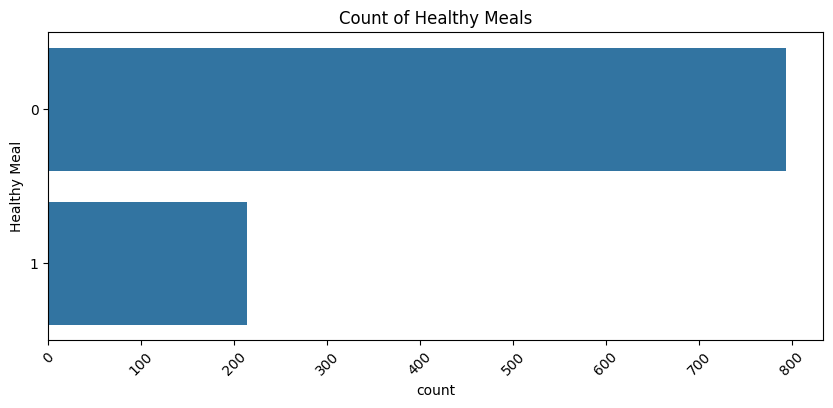

In [ ]:
avg_cal = the_df.groupby("Healthy Meal").mean().sort_values(by="Healthy Meal", ascending=True).head()
plt.figure(figsize=(10,4))
sns.countplot(the_df, y="Healthy Meal")
plt.title("Count of Healthy Meals")
plt.xticks(rotation=45)
plt.show()

### Getting Inputs and Outputs

In [ ]:
X = the_df.iloc[:, :-1].values
y = the_df.iloc[:, -1].values

In [ ]:
X

array([[9.00e+00, 5.20e+02, 6.00e+00, 3.10e+01, 2.50e+02],
       [1.20e+01, 7.50e+02, 6.00e+00, 3.30e+01, 3.00e+02],
       [2.30e+01, 1.15e+03, 7.00e+00, 3.40e+01, 4.40e+02],
       ...,
       [4.00e+00, 2.30e+02, 1.00e+00, 1.70e+01, 1.20e+02],
       [6.00e+00, 3.70e+02, 2.00e+00, 2.70e+01, 2.00e+02],
       [9.00e+00, 5.10e+02, 3.00e+00, 3.60e+01, 2.60e+02]])

In [ ]:
y

array([0, 0, 0, ..., 1, 0, 0])

### Creating the Training and Test Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [ ]:
X_train

array([[6.00e+01, 2.26e+03, 1.70e+01, 1.16e+02, 1.15e+03],
       [5.00e+00, 2.90e+02, 2.00e+00, 1.80e+01, 1.40e+02],
       [1.30e+01, 5.30e+02, 1.00e+00, 2.60e+01, 2.70e+02],
       ...,
       [1.90e+01, 6.60e+02, 7.00e+00, 2.70e+01, 3.40e+02],
       [0.00e+00, 1.20e+02, 8.10e+01, 8.10e+01, 3.00e+02],
       [2.40e+01, 7.40e+02, 7.00e+00, 2.70e+01, 4.20e+02]])

In [ ]:
X_test

array([[ 28., 550.,   2.,  45., 490.],
       [  0.,   5.,  44.,  44., 160.],
       [  6., 370.,   8.,  25., 180.],
       ...,
       [ 22., 680., 101., 121., 740.],
       [  5.,  40.,  21.,  21., 130.],
       [  0.,  45.,  54.,  54., 200.]])

In [ ]:
y_train

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0])

### Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train

array([[ 3.47688189,  3.58891808, -0.25277165,  2.40785869,  3.89292273],
       [-0.48273775, -0.29777712, -0.69734674, -0.69873603, -0.71918677],
       [ 0.09320693,  0.17572889, -0.72698508, -0.44513646, -0.12554891],
       ...,
       [ 0.52516543,  0.43221132, -0.54915504, -0.41343652,  0.19410224],
       [-0.84270317, -0.63317722,  1.64408209,  1.29836057,  0.01144444],
       [ 0.88513086,  0.59004665, -0.54915504, -0.41343652,  0.55941785]])

# **B. Building and Training the Model**

### Building and Training the Logistic Regression Model

In [ ]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Inference

In [ ]:
y_pred = log_reg.predict(scaler.transform(X_test))

y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0])

Prediction of "Healthy" using the following values:

1.   Fat = 12
2.   Sodium = 12
1.   Sugar = 8
2.   Carbs = 10
1.   Calories = 200












In [ ]:
Lpred = log_reg.predict(scaler.transform(np.array([[12,12,8,10,200]])))
Lpred_label = "Yes" if Lpred[0] == 1 else "No"
print("Healthy Meal:", Lpred_label)

Healthy Meal: Yes


# **C. Model Evaluation**

### Confusion Matrix

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[156   3]
 [  6  37]]


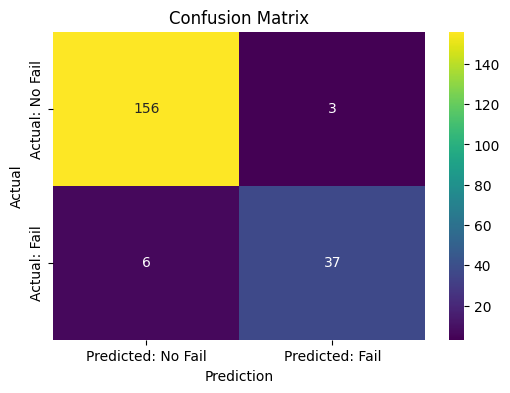

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(mat, annot=True, fmt="d", cmap="viridis",
            xticklabels=['Predicted: No Fail', 'Predicted: Fail'],
            yticklabels=['Actual: No Fail', 'Actual: Fail'])
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Accuracy

In [ ]:
print("Accuracy:\n", accuracy_score(y_test, y_pred)*100,"%")

Accuracy:
 95.54455445544554 %


### Precision, Recall, F1-score

In [ ]:
Class = classification_report(y_test, y_pred, output_dict=True)
Class = pd.DataFrame(Class).transpose()
Class

,precision,recall,f1-score,support
0,0.962963,0.981132,0.971963,159.000000
1,0.925000,0.860465,0.891566,43.000000
accuracy,0.955446,0.955446,0.955446,0.955446
macro avg,0.943981,0.920799,0.931764,202.000000
weighted avg,0.954882,0.955446,0.954849,202.000000


### ROC Curve

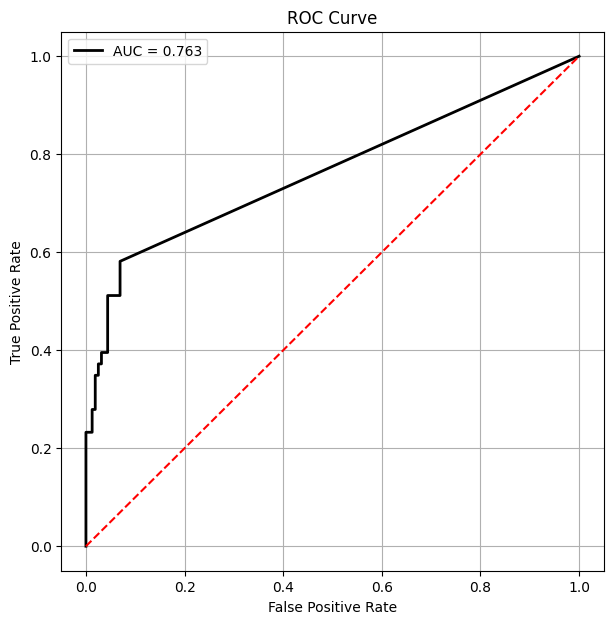

In [ ]:
y_prob = log_reg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, color='black', linewidth=2, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)